# <Font color = '00a8f3'><h1><center>Analysis of Best Venues for Chasing the Score in Cricket</h1></center> 
### <Font color = '585858'>Dataset : IPL Dataset from 2008-2020

## <Font color = '585858'> Import the Libraries

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## <Font color = '585858'>Let's read the dataset

In [123]:
df = pd.read_csv(r'C:\Users\lenovo\Downloads\IPL Matches 2008-2020.csv')

## <Font color = '585858'>Let's have a look at the dataset

In [124]:
df

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,Nitin Menon,PR Reiffel
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,NaN,PR Reiffel,S Ravi
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi


In [125]:
df.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [126]:
df.tail()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,Nitin Menon,PR Reiffel
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,NaN,PR Reiffel,S Ravi
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi
815,1237181,Dubai,2020-11-10,TA Boult,Dubai International Cricket Stadium,0,Delhi Capitals,Mumbai Indians,Delhi Capitals,bat,Mumbai Indians,wickets,5.0,N,NaN,CB Gaffaney,Nitin Menon


In [127]:
df.iloc[214]

id                               501238
city                              Delhi
date                         2011-05-02
player_of_match          P Parameswaran
venue                  Feroz Shah Kotla
neutral_venue                         0
team1                  Delhi Daredevils
team2              Kochi Tuskers Kerala
toss_winner        Kochi Tuskers Kerala
toss_decision                     field
winner             Kochi Tuskers Kerala
result                          wickets
result_margin                         7
eliminator                            N
method                              NaN
umpire1                       Asad Rauf
umpire2                      SL Shastri
Name: 214, dtype: object

## <Font color = '585858'>Let's check the column names

In [128]:
df.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2'],
      dtype='object')

In [129]:
for i in df.columns : 
    print(i)

id
city
date
player_of_match
venue
neutral_venue
team1
team2
toss_winner
toss_decision
winner
result
result_margin
eliminator
method
umpire1
umpire2


## <Font color = '585858'>Let's check the null values

In [130]:
df.isnull().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

## <Font color = '585858'>Let's create a new venue column 

<Font color = '585858'>This venue1 column will contain combined venue and city name.

In [131]:
df['venue1'] = ''

## <Font color = '585858'>Let's drop the useless columns

In [132]:
df.drop(labels = ['id', 'date', 'player_of_match', 'neutral_venue', 'result', 'result_margin', 'eliminator', 'method',
                  'umpire1', 'umpire2'], axis = 1,inplace = True)

## <Font color = '585858'>No. of matches held in each stadium

In [133]:
pd.value_counts(df['venue'])

Eden Gardens                                            77
Feroz Shah Kotla                                        74
Wankhede Stadium                                        73
M Chinnaswamy Stadium                                   65
Rajiv Gandhi International Stadium, Uppal               64
MA Chidambaram Stadium, Chepauk                         57
Sawai Mansingh Stadium                                  47
Punjab Cricket Association Stadium, Mohali              35
Dubai International Cricket Stadium                     33
Sheikh Zayed Stadium                                    29
Maharashtra Cricket Association Stadium                 21
Punjab Cricket Association IS Bindra Stadium, Mohali    21
Sharjah Cricket Stadium                                 18
Dr DY Patil Sports Academy                              17
Subrata Roy Sahara Stadium                              17
Kingsmead                                               15
M.Chinnaswamy Stadium                                   

## <Font color = '585858'>Let's check the data types

In [134]:
df.dtypes

city             object
venue            object
team1            object
team2            object
toss_winner      object
toss_decision    object
winner           object
venue1           object
dtype: object

In [135]:
df

,city,venue,team1,team2,toss_winner,toss_decision,winner,venue1
0,Bangalore,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,
1,Chandigarh,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,
2,Delhi,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,
3,Mumbai,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,
4,Kolkata,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,
...,...,...,...,...,...,...,...,...
811,Dubai,Dubai International Cricket Stadium,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,
812,Dubai,Dubai International Cricket Stadium,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,
813,Abu Dhabi,Sheikh Zayed Stadium,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,
814,Abu Dhabi,Sheikh Zayed Stadium,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,


## <Font color = '585858'>Let's check the null values in dataset

In [136]:
df.isnull().sum()

city             13
venue             0
team1             0
team2             0
toss_winner       0
toss_decision     0
winner            4
venue1            0
dtype: int64

## <Font color = '585858'>Let's handle the null values present in 'City' column

In [137]:
db = [402, 403, 407, 409, 410, 415, 417]
for i in db : 
    df.city.iloc[i] = 'Dubai'

In [138]:
sh = [404, 406, 408, 413, 414, 399]
for i in sh :
    df.city.iloc[i] = 'Sharjah'

In [139]:
df.isnull().sum()

city             0
venue            0
team1            0
team2            0
toss_winner      0
toss_decision    0
winner           4
venue1           0
dtype: int64

## <Font color = '585858'>Let's handle the null values present in 'Winner' column

<Font color = '585858'>I think the winner in these 4 matches has not been decided, this means that the match must have been canceled for some reason, so let's remove these 4 rows from the dataset.

In [140]:
df[df.winner.isnull()]

,city,venue,team1,team2,toss_winner,toss_decision,winner,venue1
241,Delhi,Feroz Shah Kotla,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,NaN,
486,Bangalore,M Chinnaswamy Stadium,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,
511,Bangalore,M Chinnaswamy Stadium,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,NaN,
744,Bengaluru,M.Chinnaswamy Stadium,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,


In [141]:
df.dropna(how = 'any', inplace = True)
df.reset_index(drop = True)

,city,venue,team1,team2,toss_winner,toss_decision,winner,venue1
0,Bangalore,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,
1,Chandigarh,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,
2,Delhi,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,
3,Mumbai,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,
4,Kolkata,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,
...,...,...,...,...,...,...,...,...
807,Dubai,Dubai International Cricket Stadium,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,
808,Dubai,Dubai International Cricket Stadium,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,
809,Abu Dhabi,Sheikh Zayed Stadium,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,
810,Abu Dhabi,Sheikh Zayed Stadium,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,


In [142]:
df.isnull().sum()

city             0
venue            0
team1            0
team2            0
toss_winner      0
toss_decision    0
winner           0
venue1           0
dtype: int64

## <Font color = '585858'>Let's combine Venue and City 

In [143]:
for i in range(len(df)) : 
    df.venue1.iloc[i] = df.venue.iloc[i] + ', ' + df.city.iloc[i]

In [144]:
df

,city,venue,team1,team2,toss_winner,toss_decision,winner,venue1
0,Bangalore,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,"M Chinnaswamy Stadium, Bangalore"
1,Chandigarh,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali, Ch..."
2,Delhi,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,"Feroz Shah Kotla, Delhi"
3,Mumbai,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,"Wankhede Stadium, Mumbai"
4,Kolkata,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,"Eden Gardens, Kolkata"
...,...,...,...,...,...,...,...,...
811,Dubai,Dubai International Cricket Stadium,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,"Dubai International Cricket Stadium, Dubai"
812,Dubai,Dubai International Cricket Stadium,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,"Dubai International Cricket Stadium, Dubai"
813,Abu Dhabi,Sheikh Zayed Stadium,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,"Sheikh Zayed Stadium, Abu Dhabi"
814,Abu Dhabi,Sheikh Zayed Stadium,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,"Sheikh Zayed Stadium, Abu Dhabi"


## <Font color = '585858'>Let's drop use less columns

In [145]:
df.drop(labels = ['city', 'venue'], axis = 1, inplace = True)

In [146]:
df.head(2)

,team1,team2,toss_winner,toss_decision,winner,venue1
0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,"M Chinnaswamy Stadium, Bangalore"
1,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali, Ch..."


## <Font color = '585858'>Decision after winning the coin toss

In [147]:
bat = field = 0 
for i in range(len(df)) : 
    if df.toss_decision.iloc[i] == 'bat' : 
        bat += 1
    else : 
        field += 1
print('Batting : {}\nFielding : {}'.format(bat, field))

Batting : 319
Fielding : 493


<Font color = '585858'>From 2008 to 2020 IPL matches, mostly captain chose fielding option after winning the toss. 

## <Font color = '585858'>Analysis of better option after winning the toss 

In [150]:
match_win_target = match_loss_target = match_win_chassing = match_loss_chassing = 0 
for i in range(len(df)) : 
    if df.toss_decision.iloc[i] == 'bat' :    # target diya
        if df.toss_winner.iloc[i] == df.winner.iloc[i] : 
            match_win_target += 1
        else :
            match_loss_target += 1
    else :          # target chase kiya or Fielding li
        if df.toss_winner.iloc[i] == df.winner.iloc[i] : 
            match_win_chassing += 1
        else :
            match_loss_chassing += 1
        
print('{} times captain choose batting option and win the match.'.format(match_win_target))
print('{} times captain choose batting option but loose the match.'.format(match_loss_target))
print('{} times captain choose fielding option and win the match.'.format(match_win_chassing))
print('{} times captain choose fielding option but loose the match.'.format(match_loss_chassing))

145 times captain choose batting option and win the match.
174 times captain choose batting option but loose the match.
273 times captain choose fielding option and win the match.
220 times captain choose fielding option but loose the match.


<Font color = '585858'>The above analysis reveals that 273 times captain choose fielding option after winning the toss and finally win the match, so if a match is being held and team wins the toss, then fielding would be a better option. Let's extract some more information from the data.

In [87]:
df

,team1,team2,toss_winner,toss_decision,winner,venue1
0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,"M Chinnaswamy Stadium, Bangalore"
1,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali, Ch..."
2,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,"Feroz Shah Kotla, Delhi"
3,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,"Wankhede Stadium, Mumbai"
4,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,"Eden Gardens, Kolkata"
...,...,...,...,...,...,...
811,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,"Dubai International Cricket Stadium, Dubai"
812,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,"Dubai International Cricket Stadium, Dubai"
813,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,"Sheikh Zayed Stadium, Abu Dhabi"
814,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,"Sheikh Zayed Stadium, Abu Dhabi"


In [88]:
df['target'] = 0
df['chase'] = 0

In [89]:
df

,team1,team2,toss_winner,toss_decision,winner,venue1,target,chase
0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,"M Chinnaswamy Stadium, Bangalore",0,0
1,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali, Ch...",0,0
2,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,"Feroz Shah Kotla, Delhi",0,0
3,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,"Wankhede Stadium, Mumbai",0,0
4,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,"Eden Gardens, Kolkata",0,0
...,...,...,...,...,...,...,...,...
811,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,"Dubai International Cricket Stadium, Dubai",0,0
812,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,"Dubai International Cricket Stadium, Dubai",0,0
813,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,"Sheikh Zayed Stadium, Abu Dhabi",0,0
814,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,"Sheikh Zayed Stadium, Abu Dhabi",0,0


## <Font color = '585858'>Let's create a specific column and describe, how the team win the match(by giving the target or by chasing the score)

In [90]:
for i in range(len(df)) : 
    if df.toss_decision.iloc[i] == 'bat' :    
        if df.toss_winner.iloc[i] == df.winner.iloc[i] : 
            df['target'].iloc[i] = 1       # captain choose batting option and win the match then it will count as target.
        else :
            df['chase'].iloc[i] = 1   # captain choose batting option and loose the match then it will count as chasing.
    else :          
        if df.toss_winner.iloc[i] == df.winner.iloc[i] : 
            df['chase'].iloc[i] = 1   # captain choose fielding option and win the match then it will count in chasing.
        else :
            df['target'].iloc[i] = 1   # captain choose fielding option and loose the match then it will count in target. 

c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [91]:
df

,team1,team2,toss_winner,toss_decision,winner,venue1,target,chase
0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,"M Chinnaswamy Stadium, Bangalore",1,0
1,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali, Ch...",1,0
2,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,"Feroz Shah Kotla, Delhi",0,1
3,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,"Wankhede Stadium, Mumbai",0,1
4,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,"Eden Gardens, Kolkata",0,1
...,...,...,...,...,...,...,...,...
811,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,"Dubai International Cricket Stadium, Dubai",1,0
812,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,"Dubai International Cricket Stadium, Dubai",1,0
813,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,"Sheikh Zayed Stadium, Abu Dhabi",0,1
814,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,"Sheikh Zayed Stadium, Abu Dhabi",1,0


## <Font color = '585858'>List of top-15 stadiums (based on no. of matches)

In [92]:
top15_stadium = ['Eden Gardens, Kolkata', 'Feroz Shah Kotla, Delhi', 'Wankhede Stadium, Mumbai',
                    'Rajiv Gandhi International Stadium, Uppal, Hyderabad',
                    'M Chinnaswamy Stadium, Bangalore',
                    'MA Chidambaram Stadium, Chepauk, Chennai',
                    'Sawai Mansingh Stadium, Jaipur', 
                    'Punjab Cricket Association Stadium, Mohali, Chandigarh',
                 'Dubai International Cricket Stadium, Dubai',
                 'Sheikh Zayed Stadium, Abu Dhabi','Maharashtra Cricket Association Stadium, Pune',
                'Punjab Cricket Association IS Bindra Stadium, Mohali, Chandigarh', 'Sharjah Cricket Stadium, Sharjah',
                 'Dr DY Patil Sports Academy, Mumbai', 'Subrata Roy Sahara Stadium, Pune']

In [103]:
# Total 36 stadiums where ipl matches held between 2008-2020.
df.venue1.value_counts().head(15)

Eden Gardens, Kolkata                                               77
Feroz Shah Kotla, Delhi                                             73
Wankhede Stadium, Mumbai                                            73
Rajiv Gandhi International Stadium, Uppal, Hyderabad                64
M Chinnaswamy Stadium, Bangalore                                    63
MA Chidambaram Stadium, Chepauk, Chennai                            57
Sawai Mansingh Stadium, Jaipur                                      47
Punjab Cricket Association Stadium, Mohali, Chandigarh              35
Dubai International Cricket Stadium, Dubai                          33
Sheikh Zayed Stadium, Abu Dhabi                                     29
Maharashtra Cricket Association Stadium, Pune                       21
Punjab Cricket Association IS Bindra Stadium, Mohali, Chandigarh    21
Sharjah Cricket Stadium, Sharjah                                    18
Subrata Roy Sahara Stadium, Pune                                    17
Dr DY 

## <Font color = '585858'>Let's extract some usefull information from the data

In [94]:
targetlist = []
chaselist = []
for i in top15_stadium : 
    print('Analysis on "{} Stadium"'.format(i))
    x = np.sum(df[df.venue1 == i].target)
    y = np.sum(df[df.venue1 == i].chase)
    print(x, 'times team gave good target and win the match.')
    print(y, 'times team easily chase the score and win the match.') 
    targetlist.append(x)
    chaselist.append(y)
    print()      

Analysis on "Eden Gardens, Kolkata Stadium"
30 times team gave good target and win the match.
47 times team easily chase the score and win the match.

Analysis on "Feroz Shah Kotla, Delhi Stadium"
34 times team gave good target and win the match.
39 times team easily chase the score and win the match.

Analysis on "Wankhede Stadium, Mumbai Stadium"
36 times team gave good target and win the match.
37 times team easily chase the score and win the match.

Analysis on "Rajiv Gandhi International Stadium, Uppal, Hyderabad Stadium"
27 times team gave good target and win the match.
37 times team easily chase the score and win the match.

Analysis on "M Chinnaswamy Stadium, Bangalore Stadium"
26 times team gave good target and win the match.
37 times team easily chase the score and win the match.

Analysis on "MA Chidambaram Stadium, Chepauk, Chennai Stadium"
35 times team gave good target and win the match.
22 times team easily chase the score and win the match.

Analysis on "Sawai Mansingh 

## <Font color = '585858'>Let's visualize the above information for better analysis.

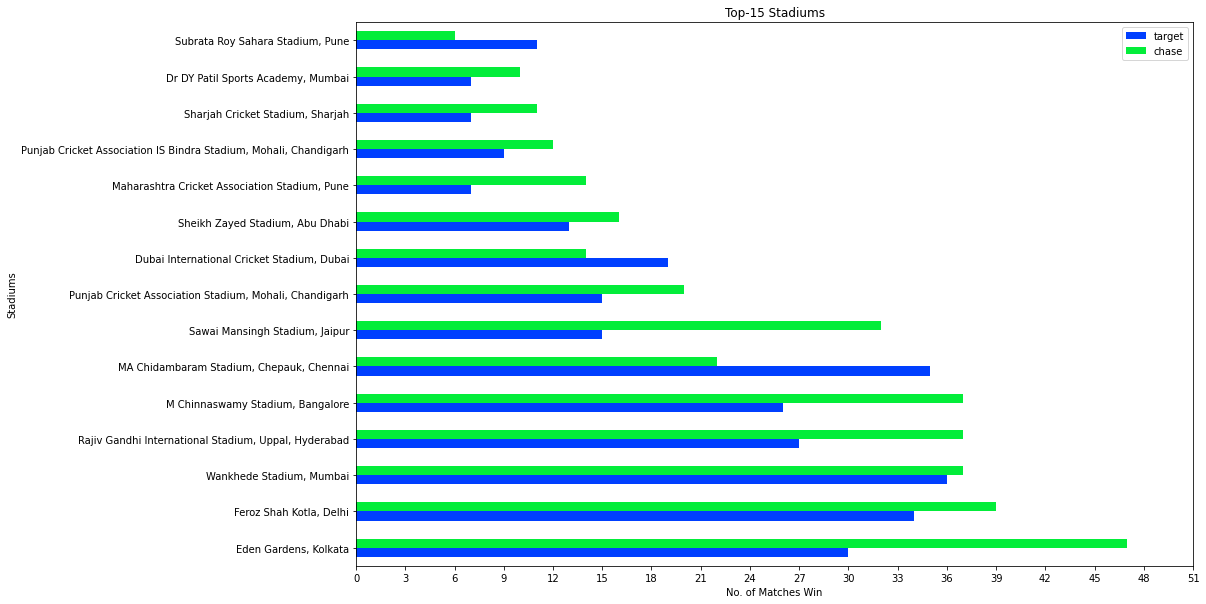

In [99]:
top15_stadium = ['Eden Gardens, Kolkata', 'Feroz Shah Kotla, Delhi', 'Wankhede Stadium, Mumbai',
                    'Rajiv Gandhi International Stadium, Uppal, Hyderabad',
                    'M Chinnaswamy Stadium, Bangalore',
                    'MA Chidambaram Stadium, Chepauk, Chennai',
                    'Sawai Mansingh Stadium, Jaipur', 
                    'Punjab Cricket Association Stadium, Mohali, Chandigarh',
                 'Dubai International Cricket Stadium, Dubai',
                 'Sheikh Zayed Stadium, Abu Dhabi','Maharashtra Cricket Association Stadium, Pune',
                'Punjab Cricket Association IS Bindra Stadium, Mohali, Chandigarh', 'Sharjah Cricket Stadium, Sharjah',
                 'Dr DY Patil Sports Academy, Mumbai', 'Subrata Roy Sahara Stadium, Pune']
 
data = {'target': [30, 34, 36, 27, 26, 35, 15, 15, 19, 13, 7, 9, 7, 7, 11],
        'chase': [47, 39, 37, 37, 37, 22, 32, 20, 14, 16, 14, 12, 11, 10, 6]}

df1 = pd.DataFrame(data,columns=['target', 'chase'], index = top15_stadium)
df1.plot.barh(figsize = (15,10))
plt.style.use('seaborn-bright')
plt.title('Top-15 Stadiums')
plt.ylabel('Stadiums')
plt.xlabel('No. of Matches Win')
plt.xticks(np.arange(0, 54, 3))
plt.show()

## <Font color = '585858'>Let's convert the above data in the terms for % for better understanding 

In [100]:
target1 = []
chase1 = []
for i in top15_stadium : 
    print(i)
    x = np.sum(df[df.venue1 == i].target)
    y = np.sum(df[df.venue1 == i].chase)
    total = x + y
    t = ((x / total) * 100)
    c = ((y / total) * 100)
    target1.append(round(t, 2))
    chase1.append(round(c, 2))
    print('{:.2f}% probablity that if you choose to bat, then you will win the match.'.format((x / total) * 100))
    print('{:.2f}% probability that if you choose to field, then you will win the match.'.format((y / total) * 100))
    print()      

Eden Gardens, Kolkata
38.96% probablity that if you choose to bat, then you will win the match.
61.04% probability that if you choose to field, then you will win the match.

Feroz Shah Kotla, Delhi
46.58% probablity that if you choose to bat, then you will win the match.
53.42% probability that if you choose to field, then you will win the match.

Wankhede Stadium, Mumbai
49.32% probablity that if you choose to bat, then you will win the match.
50.68% probability that if you choose to field, then you will win the match.

Rajiv Gandhi International Stadium, Uppal, Hyderabad
42.19% probablity that if you choose to bat, then you will win the match.
57.81% probability that if you choose to field, then you will win the match.

M Chinnaswamy Stadium, Bangalore
41.27% probablity that if you choose to bat, then you will win the match.
58.73% probability that if you choose to field, then you will win the match.

MA Chidambaram Stadium, Chepauk, Chennai
61.40% probablity that if you choose to ba

## <Font color = '585858'>Let's visualyze the above information for better unserstanding.

In [108]:
top15_stadium = ['Eden Gardens, Kolkata', 'Feroz Shah Kotla, Delhi', 'Wankhede Stadium, Mumbai',
                    'Rajiv Gandhi International Stadium, Uppal, Hyderabad',
                    'M Chinnaswamy Stadium, Bangalore',
                    'MA Chidambaram Stadium, Chepauk, Chennai',
                    'Sawai Mansingh Stadium, Jaipur', 
                    'Punjab Cricket Association Stadium, Mohali, Chandigarh',
                 'Dubai International Cricket Stadium, Dubai',
                 'Sheikh Zayed Stadium, Abu Dhabi','Maharashtra Cricket Association Stadium, Pune',
                'Punjab Cricket Association IS Bindra Stadium, Mohali, Chandigarh', 'Sharjah Cricket Stadium, Sharjah',
                 'Dr DY Patil Sports Academy, Mumbai', 'Subrata Roy Sahara Stadium, Pune']
 
data = {'Bat_first': target1,
        'Field_first': chase1}
df2 = pd.DataFrame(data,columns=['Bat_first', 'Field_first'], index = top15_stadium)
df2

,Bat_first,Field_first
"Eden Gardens, Kolkata",38.96,61.04
"Feroz Shah Kotla, Delhi",46.58,53.42
"Wankhede Stadium, Mumbai",49.32,50.68
"Rajiv Gandhi International Stadium, Uppal, Hyderabad",42.19,57.81
"M Chinnaswamy Stadium, Bangalore",41.27,58.73
"MA Chidambaram Stadium, Chepauk, Chennai",61.40,38.60
"Sawai Mansingh Stadium, Jaipur",31.91,68.09
"Punjab Cricket Association Stadium, Mohali, Chandigarh",42.86,57.14
"Dubai International Cricket Stadium, Dubai",57.58,42.42
"Sheikh Zayed Stadium, Abu Dhabi",44.83,55.17


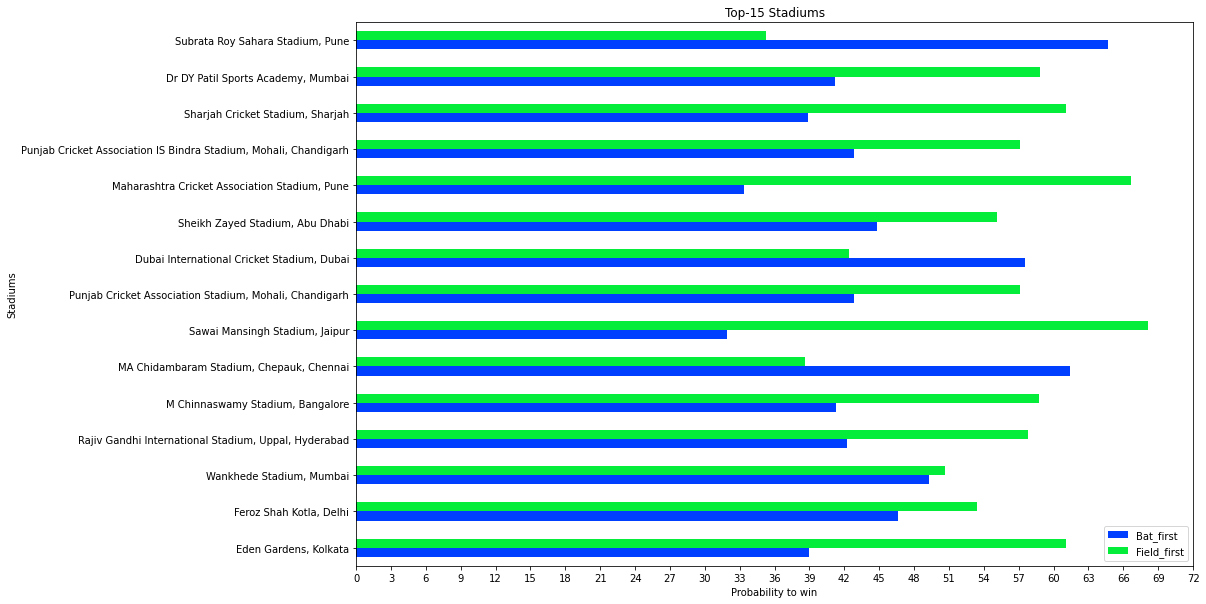

In [110]:
df2.plot.barh(figsize = (15,10))
plt.style.use('seaborn-bright')
plt.title('Top-15 Stadiums')
plt.ylabel('Stadiums')
plt.xlabel('Probability to win')
plt.xticks(np.arange(0, 75, 3))
plt.show()

# 

<img src = https://i.pinimg.com/originals/ce/0d/89/ce0d89a15b768f1c3801ab084445a382.jpg alt="Drawing" style="width: 650px;"/>

<Font color='FF031D'><center>Made with ❤ by Ronil</center>